Promedio ventas Festivos (1) vs No Festivos (0):
 is_holiday
0    302.737465
1    409.636364
Name: sales, dtype: float64


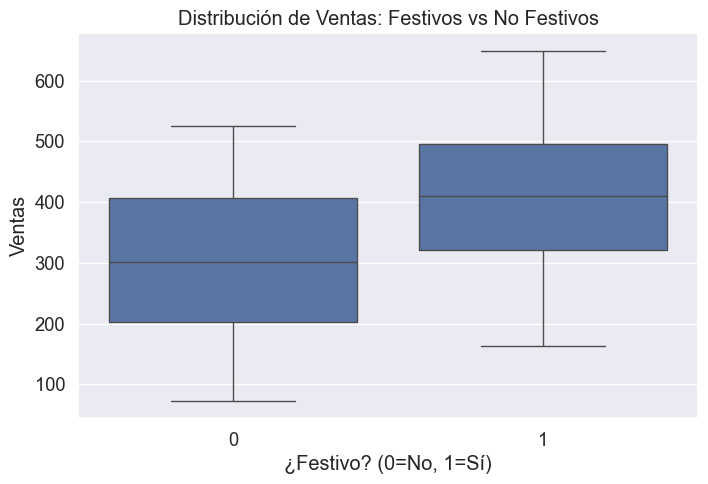

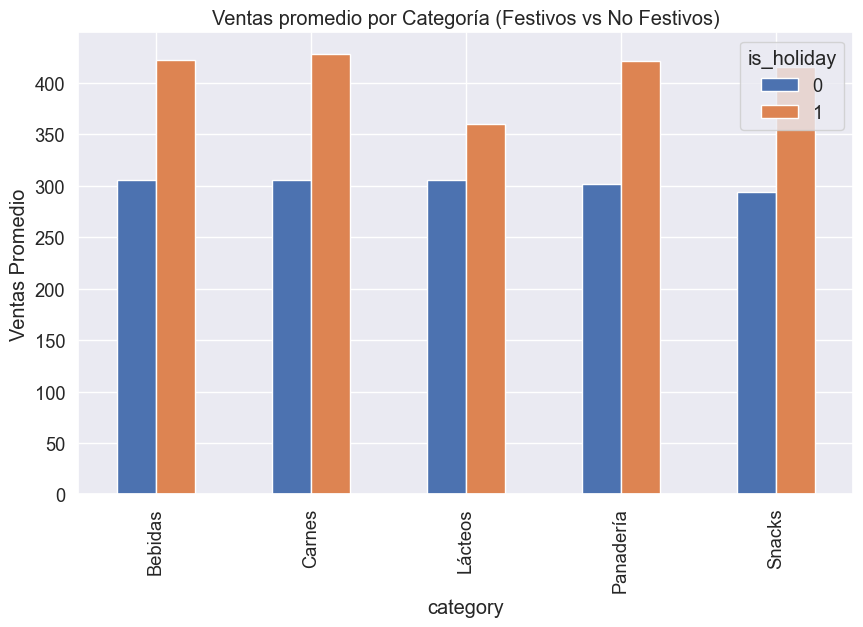

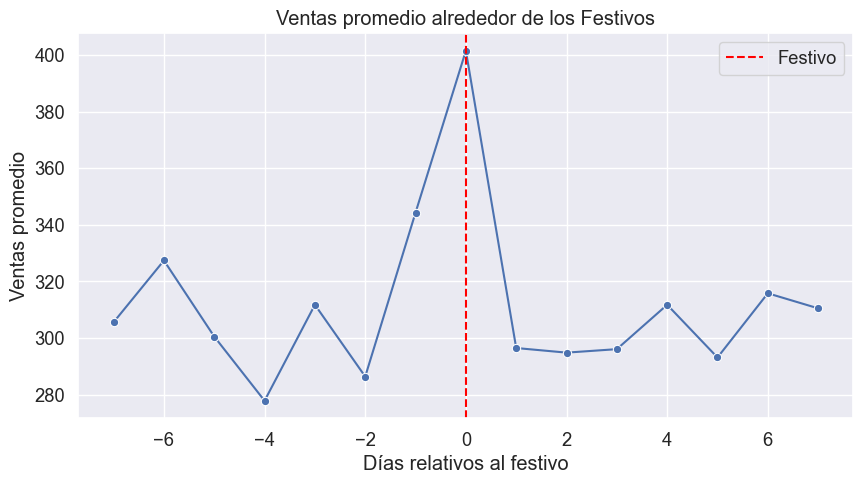

In [1]:
# ==========================
# 1. Importación de librerías
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set(font_scale=1.2)

# ==========================
# 2. Cargar dataset
# ==========================
df = pd.read_csv("reto4_sales_dataset.csv")

# ==========================
# 3. Preprocesamiento
# ==========================
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.day_name()
df["month"] = df["date"].dt.month_name()

# ==========================
# 4. Análisis Exploratorio
# ==========================

# --- A) Ventas en festivos vs. días normales ---
ventas_festivos = df.groupby("is_holiday")["sales"].mean()
print("Promedio ventas Festivos (1) vs No Festivos (0):\n", ventas_festivos)

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="is_holiday", y="sales")
plt.title("Distribución de Ventas: Festivos vs No Festivos")
plt.xlabel("¿Festivo? (0=No, 1=Sí)")
plt.ylabel("Ventas")
plt.show()

# --- B) Categorías ---
ventas_categoria = df.groupby(["category","is_holiday"])["sales"].mean().unstack()
ventas_categoria.plot(kind="bar", figsize=(10,6))
plt.title("Ventas promedio por Categoría (Festivos vs No Festivos)")
plt.ylabel("Ventas Promedio")
plt.show()

# --- C) Patrones alrededor de festivos ---
df = df.sort_values("date")
df["dias_relativos"] = np.nan

festivos = df[df["is_holiday"]==1]["date"]

for f in festivos:
    mask = (df["date"] >= f - pd.Timedelta(days=7)) & (df["date"] <= f + pd.Timedelta(days=7))
    df.loc[mask, "dias_relativos"] = (df.loc[mask, "date"] - f).dt.days

patron = df.dropna(subset=["dias_relativos"]).groupby("dias_relativos")["sales"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=patron.index, y=patron.values, marker="o")
plt.axvline(0, color="red", linestyle="--", label="Festivo")
plt.title("Ventas promedio alrededor de los Festivos")
plt.xlabel("Días relativos al festivo")
plt.ylabel("Ventas promedio")
plt.legend()
plt.show()
